In [70]:
import pandas as pd
births = pd.read_csv("births.csv")
import matplotlib.pyplot as plt 
births.head()

,Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT
0,1977,78173,4381,35069,19086,20981,6739,59602,2923
1,1978,78190,4342,35054,18964,21094,6751,59364,2600
2,1979,77669,4217,34858,18403,20523,6947,58006,2747
3,1980,78859,4181,34666,18317,20354,6660,57768,2859
4,1981,80980,4193,37545,18960,21277,7112,58104,2749


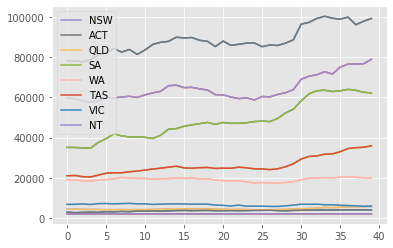

In [72]:
plt.plot(births)
line = plt.plot(births)
plt.legend(line[:8],['NSW','ACT','QLD','SA','WA','TAS','VIC','NT'])

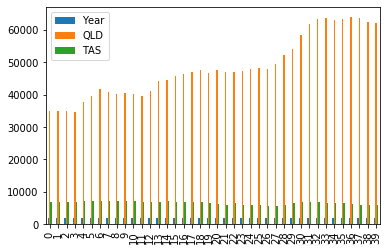

In [5]:
births1 = births[['Year','QLD','TAS']]
births1.plot.bar()

In [6]:
B2 = births.loc[births['Year'] == 2016]
B2

,Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT
39,2016,99260,5703,62190,19917,35875,5869,78953,3928


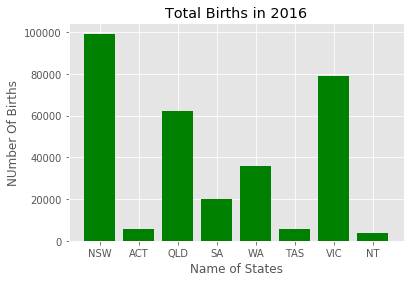

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

x = ['NSW','ACT','QLD','SA','WA','TAS','VIC','NT']
y = [99260, 5703, 62190, 19917,35875,5869,78953,3928]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green') 
plt.xlabel("Name of States") 
plt.ylabel("NUmber Of Births") 
plt.title("Total Births in 2016")

plt.xticks(x_pos, x)

plt.show()

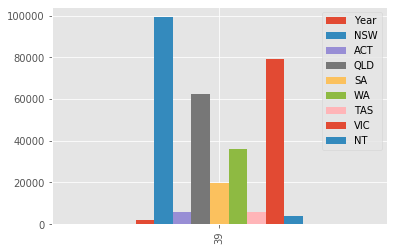

In [8]:
B2.plot.bar()

In [16]:
df = pd.DataFrame(births)

In [20]:
df['Totalbirths'] = df['NSW'] + df['ACT'] + df['QLD'] + df['SA'] + df['WA'] + df['TAS'] + df['VIC'] + df['NT']

In [35]:
df.head()

,Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT,Totalbirths
0,1977,78173,4381,35069,19086,20981,6739,59602,2923,226954
1,1978,78190,4342,35054,18964,21094,6751,59364,2600,226359
2,1979,77669,4217,34858,18403,20523,6947,58006,2747,223370
3,1980,78859,4181,34666,18317,20354,6660,57768,2859,223664
4,1981,80980,4193,37545,18960,21277,7112,58104,2749,230920


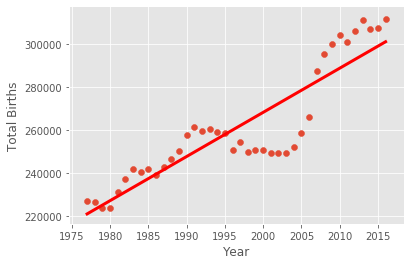

In [36]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'],df['Totalbirths'])
line = [slope*xi + intercept for xi in df['Year']]
plt.plot(df['Year'],line,'r-', linewidth=3)
plt.scatter(df['Year'], df['Totalbirths'])
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
X = df['Year'].values.reshape(-1,1)
y = df['Totalbirths'].values.reshape(-1,1)
reg = LinearRegression()
prediction = reg.fit(X, y)

In [38]:
print(f'alpha = {prediction.intercept_}')
print(f'betas = {prediction.coef_}')

alpha = [-3844202.71754221]
betas = [[2056.16998124]]


In [39]:
new_X = [[2050]]
prediction.predict(new_X)

array([[370945.74399625]])

In [40]:
new_X = [[2100]]
prediction.predict(new_X)

array([[473754.24305816]])

In [41]:
dfnew = pd.DataFrame(df.loc[[33,34,35,36,37,38,39]])
dfnew

,Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT,Totalbirths
33,2010,100355,5197,63553,20033,31689,6545,72722,3901,303995
34,2011,99385,5098,62888,19856,31846,6545,71593,3922,301133
35,2012,98886,5285,63227,20267,32939,6351,75018,4014,305987
36,2013,99926,5534,63959,20496,34513,6109,76542,4012,311091
37,2014,96119,5606,63490,20205,34932,6030,76594,3987,306963
38,2015,97857,5659,62522,19952,35149,5755,76716,4039,307649
39,2016,99260,5703,62190,19917,35875,5869,78953,3928,311695


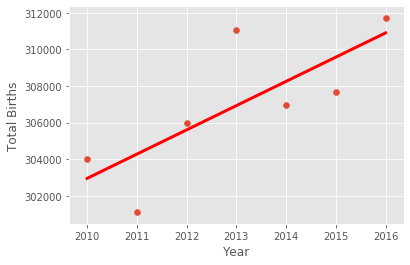

In [42]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(dfnew['Year'],dfnew['Totalbirths'])
line = [slope*xi + intercept for xi in dfnew['Year']]
plt.plot(dfnew['Year'],line,'r-', linewidth=3)
plt.scatter(dfnew['Year'], dfnew['Totalbirths'])
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.show()

In [43]:
X = dfnew['Year'].values.reshape(-1,1)
y = dfnew['Totalbirths'].values.reshape(-1,1)
reg = LinearRegression()
prediction = reg.fit(X, y)
print(f'alpha = {prediction.intercept_}')
print(f'betas = {prediction.coef_}')

alpha = [-2360869.71428571]
betas = [[1325.28571429]]


In [44]:
prediction.predict(X)

array([[302954.57142857],
       [304279.85714286],
       [305605.14285714],
       [306930.42857143],
       [308255.71428571],
       [309581.        ],
       [310906.28571429]])

In [45]:
tfr = pd.read_csv("TFR.csv")

In [46]:
tfrnew = pd.DataFrame(tfr[['Year','QLD','NT']])

In [47]:
tfrnew.head()

,Year,QLD,NT
0,1971,3.025,4.029
1,1972,2.854,3.477
2,1973,2.637,3.291
3,1974,2.500,2.988
4,1975,2.316,2.846


In [49]:
tfr1 = tfrnew['QLD'].idxmin(axis=0)
tfr1

28

In [50]:
tfr2 = pd.DataFrame(tfrnew.loc[28])
tfr2

,28
Year,1999.000
QLD,1.800
NT,2.123


In [55]:
deaths = pd.read_csv("deaths.csv")
ddf = pd.DataFrame(deaths)
ddf['Totaldeaths'] = ddf['NSW'] + ddf['ACT'] + ddf['QLD'] + ddf['SA'] + ddf['WA'] + ddf['TAS'] + ddf['VIC'] + ddf['NT']

In [56]:
ddf.head()

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,Totaldeaths
0,1977,42075,30067,16991,9715,7914,3227,715,786,111490
1,1978,40121,29343,16353,9768,7781,3299,612,782,108059
2,1979,39975,29523,16627,9748,7779,3318,586,759,108315
3,1980,39799,28925,15774,9536,8078,3199,588,755,106654
4,1981,39979,29144,17195,9806,8345,3494,671,795,109429


In [57]:
df['Naturalg'] = df['Totalbirths'] - ddf['Totaldeaths']

In [58]:
df.head()

,Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT,Totalbirths,Naturalg
0,1977,78173,4381,35069,19086,20981,6739,59602,2923,226954,115464
1,1978,78190,4342,35054,18964,21094,6751,59364,2600,226359,118300
2,1979,77669,4217,34858,18403,20523,6947,58006,2747,223370,115055
3,1980,78859,4181,34666,18317,20354,6660,57768,2859,223664,117010
4,1981,80980,4193,37545,18960,21277,7112,58104,2749,230920,121491


Text(0, 0.5, 'Natural Growth')

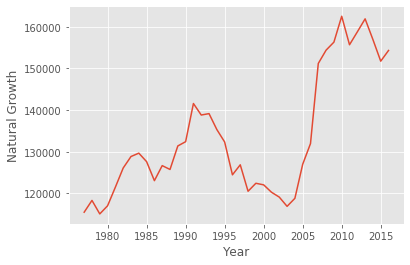

In [59]:
plt.plot(df['Year'],df['Naturalg'])
plt.xlabel('Year')
plt.ylabel('Natural Growth')

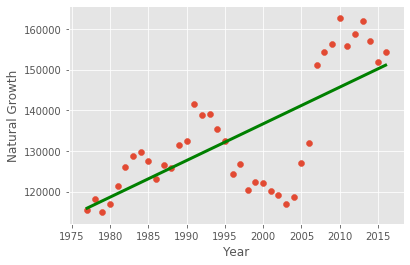

In [66]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'],df['Naturalg'])
line = [slope*xi + intercept for xi in df['Year']]
plt.plot(df['Year'],line,'g-', linewidth=3)
plt.scatter(df['Year'], df['Naturalg'])
plt.xlabel('Year')
plt.ylabel('Natural Growth')
plt.show()

In [68]:
nom = pd.read_csv("NOM.csv")
nim = pd.read_csv("NIM.csv")
nom1 = pd.DataFrame(nom)

Text(0, 0.5, 'NOM')

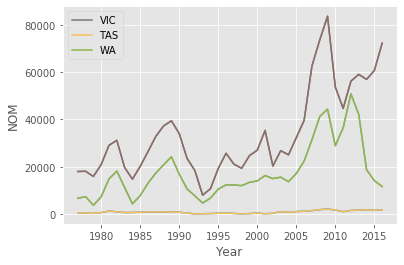

In [77]:
plt.plot(nom1['Year'],nom1 [['VIC','TAS','WA']])
line = plt.plot(nom1['Year'],nom1 [['VIC','TAS','WA']])
plt.legend(line[:3],['VIC','TAS','WA'])
plt.xlabel('Year')
plt.ylabel('NOM')

In [81]:
nom1['Totalmigration'] = nom1['NSW'] + nom1['ACT'] + nom1['QLD'] + nom1['SA'] + nom1['WA'] + nom1['TAS'] + nom1['VIC'] + nom1['NT']
nom1.head()

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,Totalmigration
0,1977,25236,17969,4012,2874,6631,506,408,261,57897
1,1978,25825,18068,6857,2638,7340,428,1428,131,62715
2,1979,28086,15874,6489,541,3698,263,442,-256,55137
3,1980,33499,20932,9480,3325,7309,599,361,436,75941
4,1981,47291,29052,18168,6655,14866,1268,1043,832,119175


Text(0, 0.5, 'Total Overseas Migration')

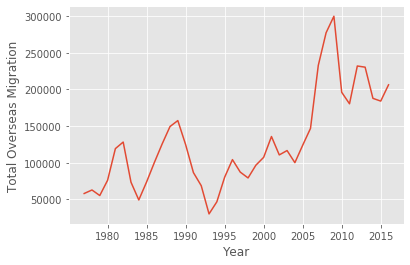

In [80]:
plt.plot(nom1['Year'],nom1 ['Totalmigration'])
plt.xlabel('Year')
plt.ylabel('Total Overseas Migration')

In [91]:
combined1 = pd.DataFrame(nom1, columns = ['Year','NSW','VIC','QLD','SA','WA','TAS','NT','ACT'])
combined2 = pd.DataFrame(nim, columns = ['NSW','VIC','QLD','SA','WA','TAS','NT','ACT'])


In [95]:
combined = pd.concat([combined1,combined2],axis = 1)

In [99]:
combined.head()

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,1977,25236,17969,4012,2874,6631,506,408,261,-9000,-10000,11000,0,5000,-1000,2000,2000
1,1978,25825,18068,6857,2638,7340,428,1428,131,-2000,-11000,12000,-1500,1500,-1000,1500,500
2,1979,28086,15874,6489,541,3698,263,442,-256,1500,-11000,13000,-4000,1000,-500,500,-500
3,1980,33499,20932,9480,3325,7309,599,361,436,-2000,-11000,17000,-4500,1500,-1000,500,-500
4,1981,47291,29052,18168,6655,14866,1268,1043,832,-14963,-15398,35054,-5109,2134,-1014,335,-1039


In [100]:
combined.tail()

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
35,2012,57226,56174,46538,12358,50780,1524,3326,4019,-18115,2417,11782,-3220,8609,-1925,-691,1145
36,2013,66763,59034,41831,11678,42138,1614,4354,2915,-14645,6420,8874,-4761,5676,-1286,-481,202
37,2014,66992,56906,27217,11640,18750,1801,1752,2715,-6751,9739,6294,-3890,-1724,-435,-2421,-812
38,2015,70309,60694,20434,11152,14071,1523,2354,3496,-6776,11079,6861,-4570,-4278,127,-2341,-103
39,2016,80007,72215,24952,11283,11621,1771,1048,3330,-11539,17639,11986,-7212,-10010,760,-2029,383


In [101]:
nom1['TotalNom'] = nom1['NSW'] + nom1['ACT'] + nom1['QLD'] + nom1['SA'] + nom1['WA'] + nom1['TAS'] + nom1['VIC'] + nom1['NT']

In [103]:
nim['TotalNim'] = nim['NSW'] + nim['ACT'] + nim['QLD'] + nim['SA'] + nim['WA'] + nim['TAS'] + nim['VIC'] + nim['NT']

In [106]:
nomnim = pd.DataFrame(nom1['TotalNom'])
nomnim1 = pd.DataFrame(nim['TotalNim'])
nomnim2 = pd.concat([nomnim,nomnim1],axis = 1)
nomnim2.tail()

,TotalNom,TotalNim
35,231945,2
36,230327,-1
37,187773,0
38,184033,-1
39,206227,-22


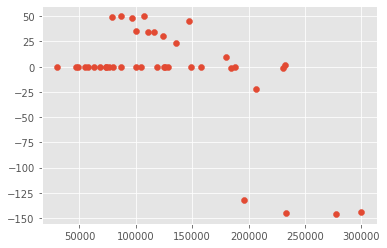

In [107]:
plt.scatter(nomnim2['TotalNom'],nomnim2['TotalNim'])

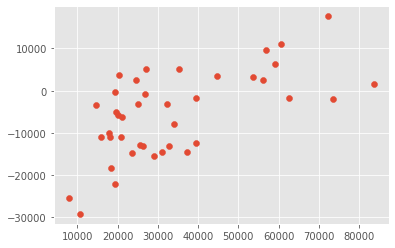

In [108]:
plt.scatter(nom1['VIC'],nim['VIC'])

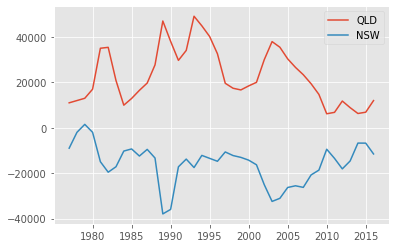

In [109]:
plt.plot(nim['Year'],nim['QLD'],label = 'QLD')
plt.plot(nim['Year'],nim['NSW'],label = 'NSW')
plt.legend()

In [112]:
tfr = pd.read_csv("TFR.csv")
tfrcom = pd.DataFrame(tfr)
tfrcom = tfrcom.drop([0,1,2,3,4,5],axis = 0)
tfrcom['Totaltfr'] = tfrcom['NSW'] + tfrcom['ACT'] + tfrcom['QLD'] + tfrcom['SA'] + tfrcom['WA'] + tfrcom['TAS'] + tfrcom['VIC'] + tfrcom['NT']
tfrcom = tfrcom.reset_index(drop = True)
vis = pd.DataFrame(ddf[['Year','Totaldeaths']])
vis1 = pd.DataFrame(df['Totalbirths'])
vis2 = pd.DataFrame(nom1['TotalNom'])
vis3 = pd.DataFrame(nim['TotalNim'])
vis4 = pd.DataFrame(tfrcom['Totaltfr'])
vis5 = pd.concat([vis,vis1,vis2,vis3,vis4],axis = 1)
vis5.head()

,Year,Totaldeaths,Totalbirths,TotalNom,TotalNim,Totaltfr
0,1977,111490,226954,57897,0,16.879
1,1978,108059,226359,62715,0,16.342
2,1979,108315,223370,55137,0,16.178
3,1980,106654,223664,75941,0,15.581
4,1981,109429,230920,119175,0,16.225


In [114]:
import pandas as pd
import numpy as np
crimes = pd.read_csv('Crime_Statistics_SA_2014_2019.csv')
fun = {'Reported Date':{'Total':'count'}}
groupbyClass2 = crimes.groupby(['Suburb - Incident','Reported Date']).agg(fun)

C:\Users\hrhar\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [115]:
fin = pd.DataFrame(groupbyClass2[groupbyClass2 >= 15])

In [117]:
fin.head()

Reported Date
                                        Total
Suburb - Incident Reported Date              
ABERFOYLE PARK    2014-01-02              NaN
                  2014-01-08              NaN
                  2014-01-09              NaN
                  2014-01-10              NaN
                  2014-01-11              NaN

In [118]:
fin.reset_index(inplace=True)

In [119]:
fin.head()

Suburb - Incident Reported Date      
                                  Total
0    ABERFOYLE PARK    2014-01-02   NaN
1    ABERFOYLE PARK    2014-01-08   NaN
2    ABERFOYLE PARK    2014-01-09   NaN
3    ABERFOYLE PARK    2014-01-10   NaN
4    ABERFOYLE PARK    2014-01-11   NaN

In [120]:
fin.dropna
fin.head()

Suburb - Incident Reported Date      
                                  Total
0    ABERFOYLE PARK    2014-01-02   NaN
1    ABERFOYLE PARK    2014-01-08   NaN
2    ABERFOYLE PARK    2014-01-09   NaN
3    ABERFOYLE PARK    2014-01-10   NaN
4    ABERFOYLE PARK    2014-01-11   NaN

In [121]:
fin2 = pd.DataFrame(fin.dropna())

In [122]:
fin2

Suburb - Incident Reported Date      
                                       Total
2304            ADELAIDE    2018-11-25  17.0
145827     NOT DISCLOSED    2014-03-19  16.0
145971     NOT DISCLOSED    2014-08-14  15.0

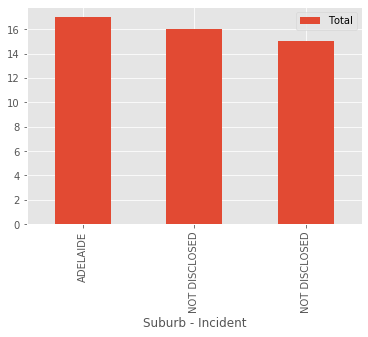

In [123]:
fin2.plot.bar(x='Suburb - Incident',y='Reported Date')

Text(0, 0.5, 'Reported More Than 15 Crimes')

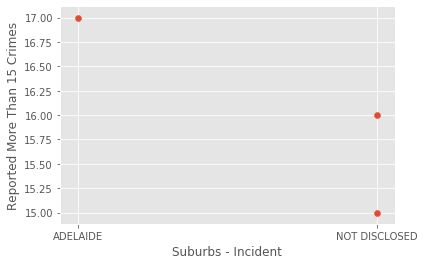

In [124]:
plt.scatter(fin2['Suburb - Incident'],fin2['Reported Date']['Total'])
plt.xlabel('Suburbs - Incident')
plt.ylabel('Reported More Than 15 Crimes')